# [Hands-on Tutorial] Bandit Algorithm and Thompson Sampling.

본 노트북은 다음의 내용들을 다룹니다.

- Multi-armed Bandit(MAB)의 구현
- MAB 문제를 해결하기 위한 여러 알고리즘의 구현
    1. Greedy Algorithm
    2. ϵ-Greedy Algorithm
    3. Thompson Sampling Algorithm
- 실험 결과를 분석하기 위한 시각화 구현



    제작자 : 이성헌 (포항공과대학교 인공지능대학원 박사과정)
    e-mail : shlee0125@postech.ac.kr


## 1. Multi-Armed Bandit의 구현

Multi-Armed Bandit은 팔이 여러 개인 슬롯머신입니다.
이 슬롯머신은 각 팔마다 서로 다른 확률로 당첨 또는 꽝이라는 리워드를 제공합니다.
우리가 도박꾼일때는 각 팔마다의 성공확률을 모른다고 가정하지만, 지금은 우리가 이 기계를 설계한다고 생각하고 성공확률을 정의하여 구현해봅시다.

우리가 만들 Bandit은 오른팔, 왼팔 두 개이고 왼팔을 당겼을 때 성공확률은 0.2, 오른팔을 당겼을 때 성공확률은 0.8 이라고 합시다.

이 Bandit은 성공확률 $\theta = (0.2,0.8)$인 Bernoulli Bandit 입니다.



In [ ]:
# Toy Bandit

import numpy as np


# STEP 1. 팔의 개수를 정의해줍니다.
n_bandits = 2


# STEP 2. 각 팔마다의 성공확률을 정의해줍니다.
p_bandits = [0.2, 0.8]


# STEP 3. 팔을 당기는 함수를 정의해줍니다.
def pull(i):    # 팔의 index i를 넣으면 해당 팔을 당겨주는 함수

# STEP 4. 난수를 이용해 팔이 어떻게 하면 성공한 것인지 실패한 것인지 정의해줍니다.
    if np.random.rand() < p_bandits[i]:     # np.random.rand()는 [0,1]에서 하나의 수를 균등한 확률로 하나 뽑아줍니다.
        return 1
    else :
        return 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


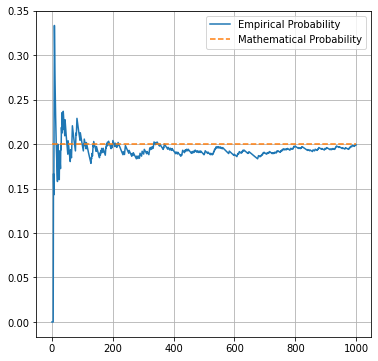

In [ ]:
# 시각화 도구를 이용해 Bandit이 잘 작동하는지 테스트해봅시다.

import matplotlib.pyplot as plt

'''
큰 수의 법칙
경험적 확률과 수학적 확률 사이의 관계를 나타내는 법칙.
표본의 크기가 커지면 통계적 확률이 수학적 확률에 가까워짐을 의미.
'''

# n번 하나의 팔만 당겨서 상대도수가 어디로 수렴하는지 체크해봅시다.

arm = 0         # 팔 선택
times = 1000    # 시행횟수
history = []    # 시행결과기록

x = np.arange(0,times)
y = np.zeros(times)

for n in range(times):
    outcome = pull(arm)           # 팔을 당긴다.
    history.append(outcome)        # 팔을 당겨 얻은 결과를 history에 기록한다.
    y[n] = np.sum(history)/(n+1)      # (n+1)번째 상대도수는 성공횟수/시행횟수 


# 시각화
plt.figure(figsize = (6,6)) # figure 사이즈 설정
plt.plot(x,y, label = 'Empirical Probability')  # 경험적 확률을 그립니다.
plt.plot(x,[p_bandits[arm]]*times, '--', label = 'Mathematical Probability')    # 경험적 확률이 수학적 확률로 수렴하는지 확인하기 위해 실제 확률을 점선으로 그립니다.
plt.legend()                # 그림에 각 그래프의 label이 무엇인지 표시하는 도표를 띄웁니다.
plt.grid()                  # 그림에 그리드를 그려넣습니다.


잘 수렴합니까? 잘 수렴하지 않아보인다면 시행횟수 `times`를 늘려보세요.

`times`가 어느정도 되어야 수렴하는 것처럼 보입니까?

### **실습문제 1**) 두 개의 팔을 각각 1000번씩 당겨서 얻은 결과를 하나의 피규어에 동시에 담아보세요.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


(0.0, 1.0)

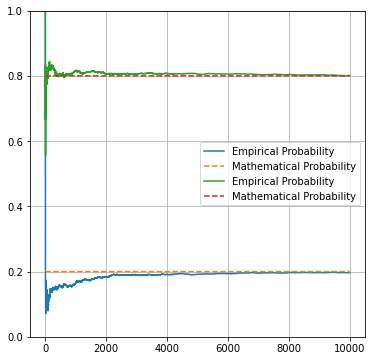

In [ ]:
import matplotlib.pyplot as plt

times = 10000    # 시행횟수
history = []    # 시행결과기록

x = np.arange(0,times)
y = np.zeros(times)

plt.figure(figsize = (6,6))




    # 시각화

    plt.plot(x,y, label = 'Empirical Probability')  # 경험적 확률을 그립니다.
    plt.plot(x,[p_bandits[arm]]*times, '--', label = 'Mathematical Probability')    # 경험적 확률이 수학적 확률로 수렴하는지 확인하기 위해 실제 확률을 점선으로 그립니다.




plt.legend()                # 그림에 각 그래프의 label이 무엇인지 표시하는 도표를 띄웁니다.
plt.grid()                  # 그림에 그리드를 그려넣습니다.
plt.ylim([0,1])   



### **실습문제 2**) 팔이 세 개인 벤딧을 구현해보고 위와 같이 실험을 통해 큰 수의 법칙이 잘 작동하는지 시각적으로 확인해보세요.

In [ ]:
n_bandits = 3 
p_bandits = [0.45, 0.55, 0.60]


def pull(i):
    


## 2. MAB 문제를 해결하기 위한 여러 알고리즘의 구현

MAB 문제를 마주한 우리는 각 arm의 성공확률을 모릅니다.
우리에게 자원이 무한히 많다면, 각 arm을 무수히 많이 당겨보는 것으로 큰 수의 법칙에 의해 성공확률을 예측할 수 있을 것입니다.
그러나, 우리에게 자원은 유한합니다.

우리는 **유한한 자원** 하에서 **성공확률이 가장 높은 팔**을 가장 빠르고 효과적으로 찾아낼 수 있길 원합니다.

여기서는 Beta 분포를 가정한 Bernouli Bandit 문제에서 가장 좋은 Bandit을 찾기 위한 알고리즘들을 구현합니다.


모든 알고리즘이 데이터를 학습해나가는 과정은 동일합니다.

1. 매 시행마다 정해진 정책에 따라 벤딧 시행을 수행하여 그 결과들을 수집합니다.

2. 현재까지 수집된 데이터를 근거로 모델의 파라미터를 추정합니다.

3. 업데이트된 모델을 이용해 새로운 정책을 만들어냅니다.




In [ ]:
# Toy Bandit

import numpy as np

n_bandits = 2
p_bandits = [0.2, 0.8]

def pull(i):    # 팔의 index i를 넣으면 해당 팔을 당겨주는 함수
    if np.random.rand() < p_bandits[i]:
        return 1
    else :
        return 0

### 2-1) Greedy Algorithm

Greedy Algorithm은 이름 그대로 욕심쟁이 알고리즘입니다.
이 알고리즘이 욕심쟁이라고 하는 이유는 현재까지의 정보를 가지고, 지금 당장의 가장 큰 reward를 낼 수 있는 arm을 선택하기 때문입니다. 즉, 전체적으로 가장 큰 이득을 취하기 위해서는 지금 바로 취할 수 있는 최상의 이득을 취해야한다는 욕심쟁이와 같은 철학을 가지고 있기 때문입니다.


In [ ]:
import scipy
import scipy.stats as stats

times = 1000        # 시행횟수

trials = np.zeros(n_bandits)                # trials에는 각 bandit을 당길때마다 count를 늘려줍니다.
success = np.zeros(n_bandits)               # success에는 각 bandit을 당겨서 성공할때마다 count를 늘려줍니다.

# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1,times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3 : theta를 각 사전분포의 평균으로 업데이트한다. thata는 알고리즘의 모델을 의미.
    theta = [d.mean() for d in bandit_priors]

    # STEP 4: theta에 따라 가장 높은 확률을 보이는 bandit을 선택
    chosen_bandit = np.argmax(theta)

    # STEP 5: 선택된 bandit을 당겨서 결과를 관찰
    outcome = pull(chosen_bandit)

    # STEP 6: 시행횟수와 결과를 업데이트
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome


print(theta)

[0.4, 0.782565130260521]


### 2-2) $\epsilon$-Greedy Algorithm

Greedy Algorithm의 단점은 현재 수집된 정보만을 토대로 모델을 최적화하기 때문에 아직 수집되지 못한 정보를 영영 수집하지 못할 가능성이 있다는 것입니다.

$\epsilon$-Greedy는 이를 극복하기 위해, $\epsilon$의 확률로 탐색(Exploration)을 수행하도록 합니다.

여기서 탐색은 현재 모델의 파라미터와 상관없이 임의의 벤딧을 선택하는 것을 말합니다.

### **실습문제 3)** 위 Greedy Algorithm 코드를 참고하여서 $\epsilon$-Greedy Algorithm을 구현해보세요.

In [ ]:
import scipy
import scipy.stats as stats

times = 1000        # 시행횟수

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
epsilon = 0.1


# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1,times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3: Exploration을 할지 말지 결정.
    

    # STEP 3-1 : 만약 greedy하기로 했다면?
    
        
     
    
    # STEP 3-2 : 만약 exploration하기로 했다면?
    
    


    # STEP 4: 선택된 bandit을 당겨서 결과를 관찰
    outcome = pull(chosen_bandit)

    # STEP 5: 시행횟수와 결과를 업데이트
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

print(theta)

[0.175, 0.794392523364486]


## 2-3) Thompson Sampling Algorithm

$\epsilon$-Greedy 알고리즘은 일정확률로 탐색을 수행한다는 점에서 Greedy Algorithm보다 더욱 좋은 정책을 찾을 가능성이 높습니다.

그러나, $\epsilon$의 확률로 임의의 벤딧을 탐색하면서 명백히 optimal이 아닌 벤딧을 선택할 가능성이 생깁니다.

이는 모델을 학습할 때 불필요하게 계산량이 많아지도록 만듭니다.

Thompson Sampling은 사전분포에서 파라미터를 샘플링하는 것으로 Exploitation과 Exploration의 균형을 효율적으로 맞추도록 합니다.

사전분포에서 파라미터를 샘플링하게 되면 파라미터는 분포의 평균 근처에서 샘플될 확률이 높을테니, 이러한 경우엔 Exploitation이 될 것입니다.

그러나 항상 분포의 평균 근처에서만 샘플링하지 않으므로, 어떤 경우엔 Exploration을 수행하게 될 것입니다.



In [ ]:
import scipy
import scipy.stats as stats

times = 1000        # 시행횟수

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)


# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1, times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3 : 각 사전분포에서 하나의 샘플을 취합니다. 여기에서 Exploration을 할 수 있는 가능성을 얻는다.
    theta = [d.rvs(1) for d in bandit_priors]
    
    # STEP 4 : 가장 성공확률이 높은 bandit을 선택.
    chosen_bandit = np.argmax(theta)

    # STEP 5 : 해당 bandit을 당깁니다.
    outcome = pull(chosen_bandit)
    # STEP 6 : 시행횟수와 결과를 업데이트.
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

print(theta)

[array([0.33526269]), array([0.80231202])]


위 코드에서 가장 중요한 코드는

`theta = [
        d.rvs(1) for d in bandit_priors
    ]`

입니다.

위 코드의 의미는 다음과 같습니다.

`bandit_priors`에는 각 벤딧별 Beta 분포가 들어 있습니다.
여기에서 $d$ 번째 벤딧을 선택한 뒤, 그 벤딧의 베타 분포를 `d`로 할당합니다.

다음으로 `d.rvs(1)`로 해당 Beta 분포에서 하나의 샘플을 추출합니다.
여기서 `.rvs(1)`란, random variable sampling의 약자로 한 개의 표본을 임의 추출하라는 것을 의미합니다.

참고 : https://github.com/scipy/scipy/blob/v1.8.1/scipy/stats/_distn_infrastructure.py#L1033-L1108

---

## 3. 분포의 변화를 관찰하는 시각화 구현

여기서는 모델이 학습되는 과정을 관찰하기 위한 시각화를 구현해보도록 하겠습니다.

모델이 학습되는 과정을 관찰하기 위한 방법 중 하나는 시행을 할 때마다 파라미터가 업데이트 되면서 사전분포가 어떻게 변해가는지 살펴보는 것입니다.



In [ ]:
# 시각화 함수 구현
plots = [1, 100, 200, 500, 1000]    # 몇 번의 시행횟수마다 시각화를 할 것인지 설정


def plot(priors, step, ax):         # 사전분포와 단계, 그리고 ax 모듈 (빈 부분그림)을 받아서 그 위에 그리도록함.     
    plot_x = np.linspace(0.001, .999, 100)  # 정의역 설정
    
    for prior in priors:            
        y = prior.pdf(plot_x)       # 각 벤딧의 사전분포의 pdf를 가져옴
        p = ax.plot(plot_x, y)      # p에는 사전분포의 그래프 그림이 담겨있음
        ax.fill_between(plot_x, y, 0, alpha=0.2)    # 그래프 아래 부분의 면적을 색칠함

    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
    plt.subplots_adjust(hspace=1) #각 그래프들이 서로 겹치지 않게 세로 간격 조절

[0.3333333333333333, 0.791]


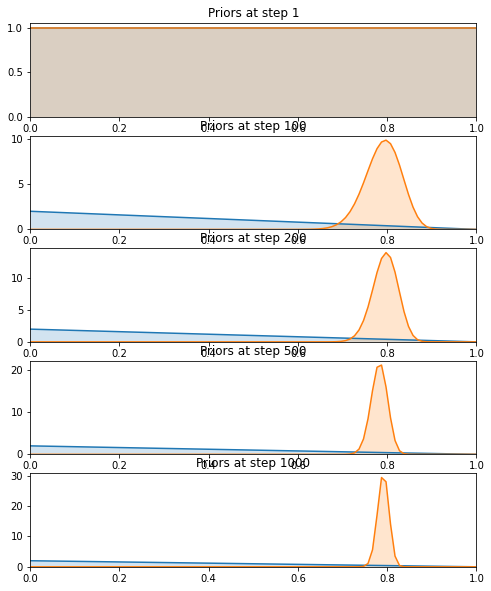

In [ ]:
# Greedy Algorithm

fig, axs = plt.subplots(len(plots), 1, figsize=(8, 10))
axs = axs.flat

times = 1000        # 시행횟수

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)

for n in range(1,times+1):
    # 각 bandit에 대한 사전분포(Beta distribution) 및 모델 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    theta = [d.mean() for d in bandit_priors]

    chosen_bandit = np.argmax(theta)
    outcome = pull(chosen_bandit)

    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))


print(theta)

[0.22, 0.7899159663865546]


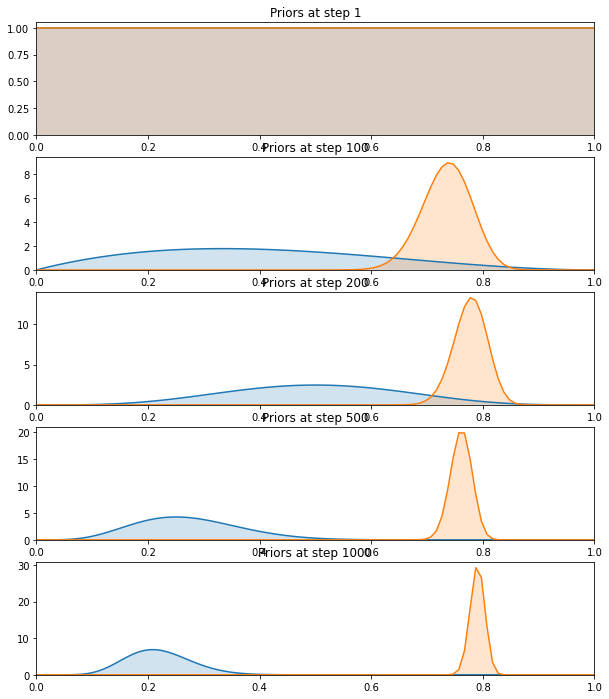

In [ ]:
# epsilon-Greedy Algorithm

fig, axs = plt.subplots(len(plots), 1, figsize=(10, 12))
axs = axs.flat

times = 1000        # 시행횟수

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
epsilon = 0.1


for n in range(1,times+1):
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    #Exploration을 할지 말지 결정.
    be_greedy = np.random.rand() > epsilon
    #만약 greedy하기로 했다면?
    if be_greedy:
        theta = [d.mean() for d in bandit_priors]
        chosen_bandit = np.argmax(theta)      
    #만약 exploration하기로 했다면?
    else :
        chosen_bandit = np.random.choice(n_bandits)

    outcome = pull(chosen_bandit)
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))


print(theta)

[array([0.02933157]), array([0.80493522])]


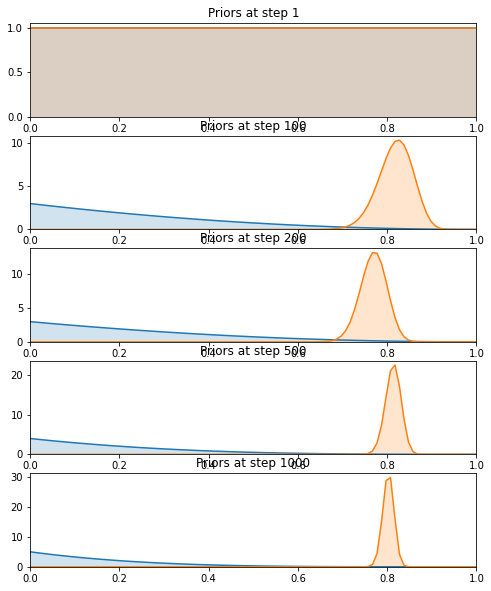

In [ ]:
# Thompson Sampling Algorhithm

import scipy
import scipy.stats as stats

fig, axs = plt.subplots(len(plots), 1, figsize=(8, 10))
axs = axs.flat


times = 1000        # 시행횟수

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
theta = np.ones(n_bandits)*(1/n_bandits)

for n in range(1, times+1):
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    theta = [d.rvs(1) for d in bandit_priors] #각 사전분포에서 하나의 샘플을 취함.
    chosen_bandit = np.argmax(theta)
    outcome = pull(chosen_bandit)
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))    

print(theta)

그 외에 어떤 시각화를 수행할 수 있을까요?

예컨데, 시행할때마다 어떤 벤딧을 선택하는지를 관찰해나갈 수 있을 것입니다.

- ***숙제 1*** : 여러분이 스스로 각 알고리즘의 학습과정을 관찰할 수 있는 시각화 함수를 만들어보세요.

- ***숙제 2*** : 시각화 분석 자료를 어떻게 해석해야 할까요? 조별로 만든 시각화 정보를 토대로 여러분만의 데이터 분석을 해보고, 그것을 간략한 보고서로 작성해보세요.

- ***숙제 3*** : 현재 Bernouli Bandit은 각 Bandit이 성공시 Reward가 1, 실패시 0로 설정되어 있습니다. 만약, 각 Bandit마다 성공시 Reward를 다르게 설정한다면 어떨까요? 다섯개의 팔이 있고 각각의 성공확률이 0.41, 0.42, 0.43, 0.44, 0.45이며, 리워드는 5, 3, 2, 4, 1인 MAB를 구현해보고 Greedy, $\epsilon$-Greedy, Thompson Sampling이 잘 작동하는지 살펴보세요.


## References
- https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
- https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/Bandit%20Algorithms%20for%20Website%20Optimization%20%5BWhite%202013-01-03%5D.pdf


---